# Dynamic financial analysis using Markov chains

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Initialization

In [60]:
M = 8
a = 0.1
b = 6
annual_payout_levels = np.array([20.33, 29.12, 20.1, 20.42, 25.74, 30.68, 36.29, 41.93, 43.17])/100		
# annual_payout_levels = np.array([10, 20, 40, 60, 90])/100		

P = np.zeros((M+1,M+1))

P[0][0] = 1.0
for i in range(1,len(P)):
    for j in range(len(P[0])):
        if j == M:
            P[i][j] = len(np.where(i + round(b*(1-a)) - (b*annual_payout_levels).round() >= M)[0])/len(annual_payout_levels)
        elif j == 0:
            P[i][j] = len(np.where(i + round(b*(1-a)) - (b*annual_payout_levels).round() <= 0)[0])/len(annual_payout_levels)
        else:
            P[i][j] = len(np.where(i + round(b*(1-a)) - (b*annual_payout_levels).round() == j)[0])/len(annual_payout_levels)

In [61]:
print(P, end="\n\n")

for i in range(len(P)):
    print(sum(P[i]), end=" ")

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.22222222 0.44444444 0.33333333
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.22222222 0.44444444
  0.33333333 0.         0.        ]
 [0.         0.         0.         0.         0.         0.22222222
  0.44444444 0.33333333 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.22222222 0.44444444 0.33333333]
 [0.         0.         0.         0.         0.         0.
  0.         0.22222222 0.77777778]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.        ]]

1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

In [62]:
N = 13
b = 1667 # insurance premium at the initial time (2022)
u1 = 576 # initial (2022) capital of the company

years = np.arange(2014,2023,1)
annual_payout_levels = np.array([20.33, 29.12, 20.1, 20.42, 25.74, 30.68, 36.29, 41.93, 43.17])/100		

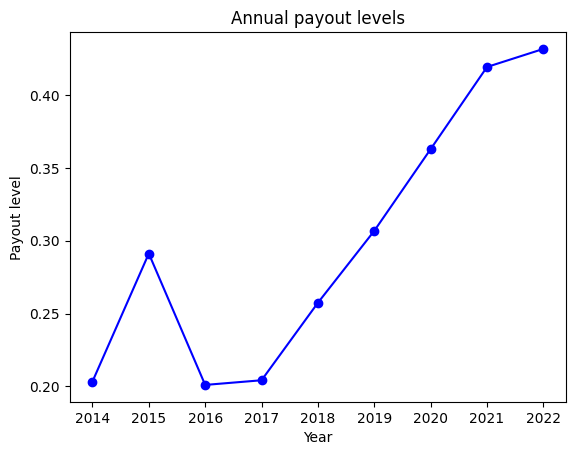

In [63]:
plt.title("Annual payout levels")
plt.ylabel("Payout level")
plt.xlabel("Year")
plt.plot(years, annual_payout_levels, color="blue")
plt.plot(years, annual_payout_levels, "o", color="blue")
plt.show()

# Markov chain generation

In [64]:
def generate_matrix_P(M, a, b, annual_payout_levels):
    P = np.zeros((M+1,M+1))

    P[0][0] = 1.0
    for i in range(1,len(P)):
        for j in range(len(P[0])):
            if j == M:
                P[i][j] = len(np.where(i + round(b*(1-a)) - (b*annual_payout_levels).round() >= M)[0])/len(annual_payout_levels)
            elif j == 0:
                P[i][j] = len(np.where(i + round(b*(1-a)) - (b*annual_payout_levels).round() <= 0)[0])/len(annual_payout_levels)
            else:
                P[i][j] = len(np.where(i + round(b*(1-a)) - (b*annual_payout_levels).round() == j)[0])/len(annual_payout_levels)
    
    return P

In [65]:
def P_to_power_T(P, T):
    return np.linalg.matrix_power(P, T)

In [66]:
a = 0.7 # share of premiums spent on servicing insurance contracts
M = 2452

P = generate_matrix_P(M, a, b, annual_payout_levels)

In [67]:
P_to_pow_10 = P_to_power_T(P, 10)

print("Default probability at time T = 10:", P_to_pow_10[u1][0])

Default probability at time T = 10: 0.14144627091326714


In [68]:
for T in range(10, 101, 10):
    P_to_power = P_to_power_T(P, T)
    print(f"Default probability at time T = {T}:", round(P_to_power[u1][0],2))

Default probability at time T = 10: 0.14
Default probability at time T = 20: 0.28
Default probability at time T = 30: 0.36
Default probability at time T = 40: 0.41
Default probability at time T = 50: 0.45
Default probability at time T = 60: 0.48
Default probability at time T = 70: 0.51
Default probability at time T = 80: 0.53
Default probability at time T = 90: 0.55
Default probability at time T = 100: 0.56
